In [38]:
import numpy as np 
import pandas as pd 
# from pandas_datareader.data import DataReader
from datetime import datetime

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

In [40]:
df = pd.read_csv('/content/ORCL_data.csv')
print(df.shape)
df.head()

(1257, 7)


,date,open,high,low,close,volume,Name
0,2013-02-08,34.76,34.98,34.50,34.90,19255621,ORCL
1,2013-02-11,34.98,35.04,34.55,34.96,12648514,ORCL
2,2013-02-12,34.89,35.25,34.85,35.11,14665754,ORCL
3,2013-02-13,35.21,35.26,34.88,34.99,13176762,ORCL
4,2013-02-14,34.87,35.07,34.69,34.90,15886750,ORCL


**Adding a new Year column**

In [41]:
df['year'] = pd.DatetimeIndex(df['date']).year


**Visualizing Yearly Based Open, Close, High and Low Stocks MAX**

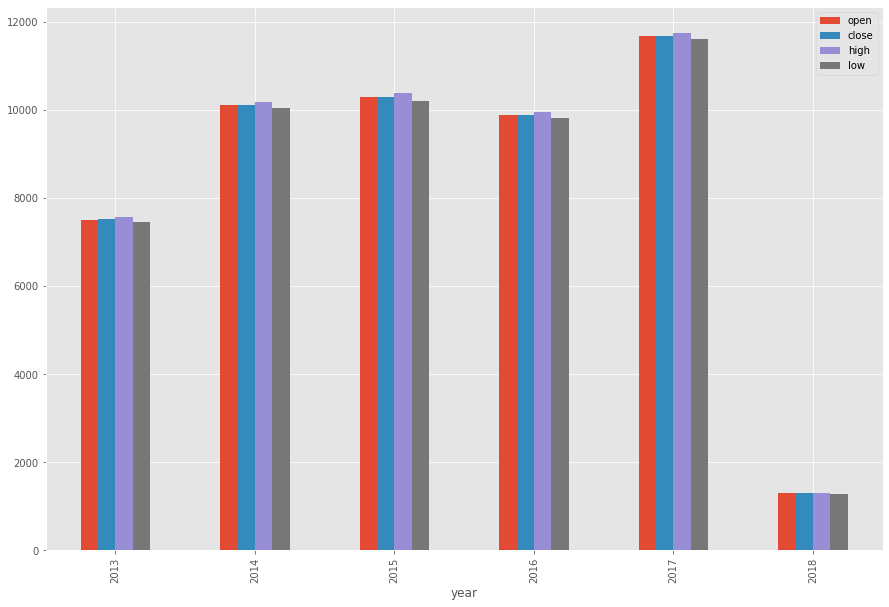

In [42]:
tempdf = df.groupby('year',as_index=False).sum()
tempdf.plot('year',['open','close','high','low'],kind = 'bar')

**Visualizing the amount of stocks sold over year**

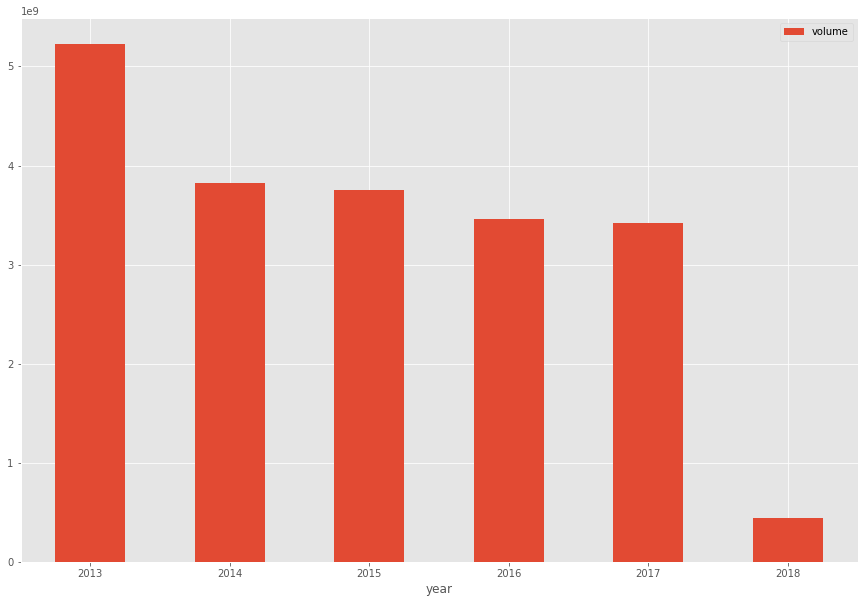

In [43]:
x = df.groupby('year').sum().sort_values('volume', ascending = False)
x.plot.bar( y='volume', rot=0)

**Visualizing the amount of data each year**

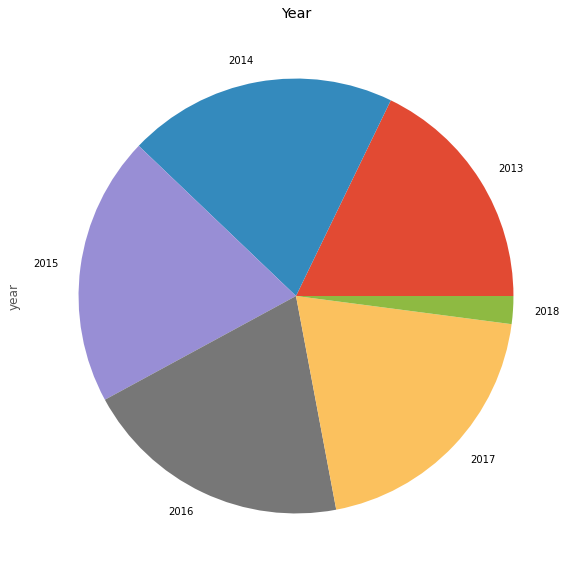

In [44]:
df.groupby('year')['year'].agg('count').plot(kind='pie',title='Year')
plt.show()

In [45]:
newDf = df[(df.year==2013)]
newDf.volume.sum()
s = df.year.value_counts()
x = s.to_dict()
x

{2013: 224, 2014: 252, 2015: 252, 2016: 252, 2017: 251, 2018: 26}

In [46]:
def yearlyAllocatedData(years_dict,totalSize):
    allocation = []
    for i in years_dict:
        allocation.append((100 * years_dict[i] / totalSize))
    return allocation

In [47]:
print(yearlyAllocatedData(x,len(df)))

[20.047732696897373, 20.047732696897373, 20.047732696897373, 19.968178202068415, 17.820206841686556, 2.0684168655529036]


**Filtering 2018 data since, there is very less number of data we have for that year**

In [48]:
df = df[df['year'] != 2018]
df

,date,open,high,low,close,volume,Name,year
0,2013-02-08,34.76,34.98,34.500,34.90,19255621,ORCL,2013
1,2013-02-11,34.98,35.04,34.550,34.96,12648514,ORCL,2013
2,2013-02-12,34.89,35.25,34.850,35.11,14665754,ORCL,2013
3,2013-02-13,35.21,35.26,34.880,34.99,13176762,ORCL,2013
4,2013-02-14,34.87,35.07,34.690,34.90,15886750,ORCL,2013
...,...,...,...,...,...,...,...,...
1226,2017-12-22,47.23,47.40,47.095,47.36,11197347,ORCL,2017
1227,2017-12-26,47.37,47.58,47.250,47.43,7650197,ORCL,2017
1228,2017-12-27,47.25,47.47,47.150,47.38,8132189,ORCL,2017
1229,2017-12-28,47.30,47.55,47.300,47.52,7777596,ORCL,2017


**Grapical Visualization of  Open, Close, High and Low Stocks over Days**

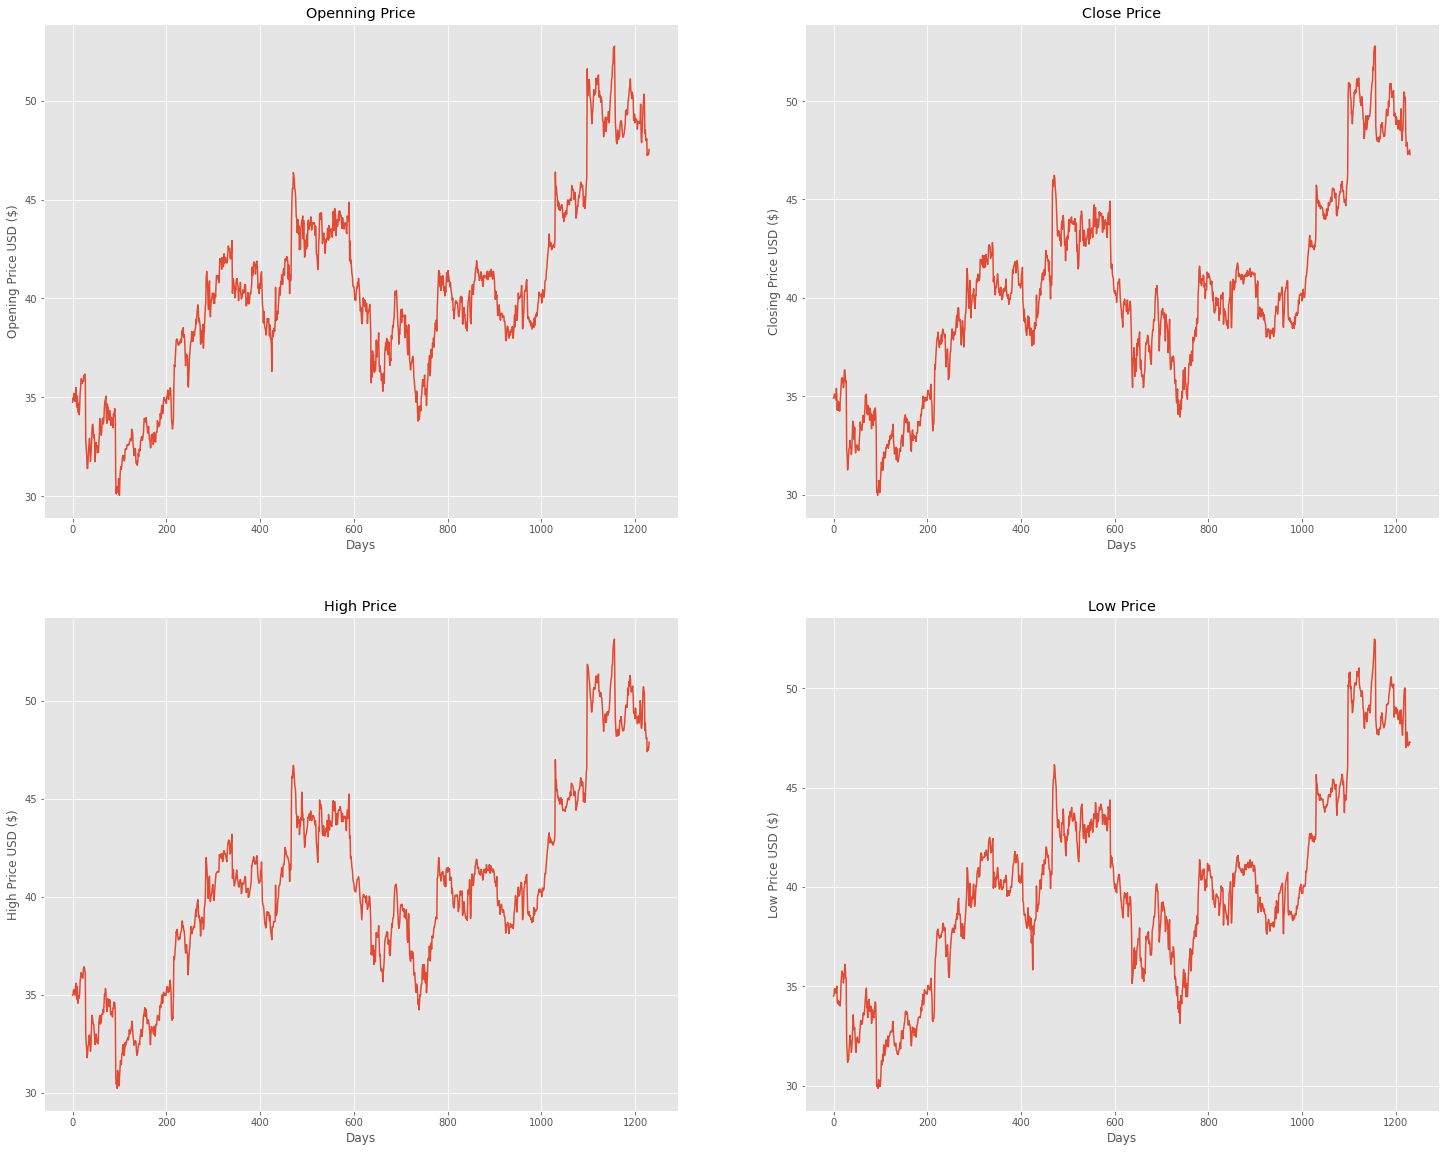

In [49]:
fig = plt.figure(figsize=(25,20))

# Visualizing the opening prices of the data.
plt.subplot(2,2,1)
plt.title('Openning Price')
plt.xlabel('Days')
plt.ylabel('Opening Price USD ($)')
plt.plot(df['open'])

# Visualizing the closing prices of the data.
plt.subplot(2,2,2)
plt.title('Close Price')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(df['close'])

# Visualizing the high prices of the data.
plt.subplot(2,2,3)
plt.title('High Price')
plt.xlabel('Days')
plt.ylabel('High Price USD ($)')
plt.plot(df['high'])

# Visualizing the low prices of the data.
plt.subplot(2,2,4)
plt.title('Low Price')
plt.xlabel('Days')
plt.ylabel('Low Price USD ($)')
plt.plot(df['low'])

plt.show()

**Grapical Visualization of Date Over Open, Close, High and Low Stocks**

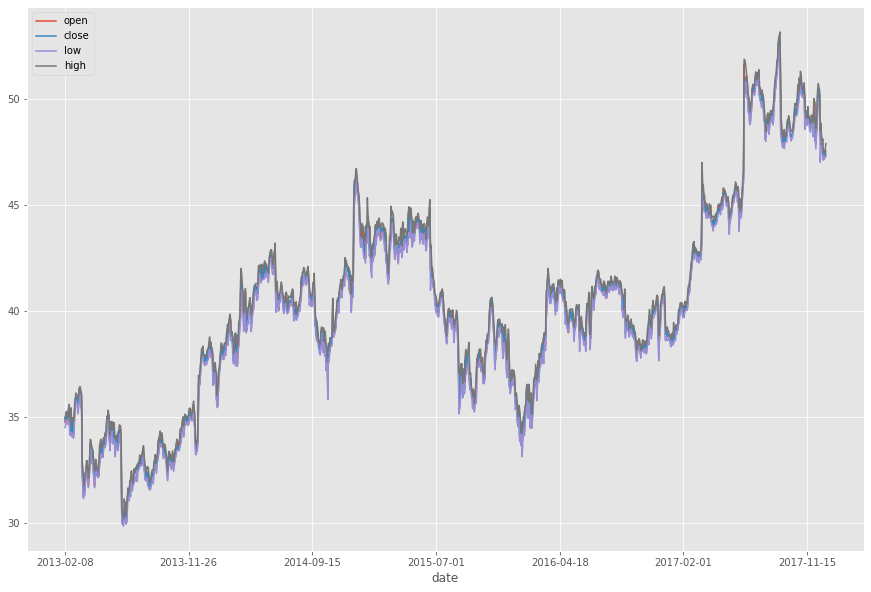

In [50]:
df.plot(kind = "line",x = 'date' , y = ['open', 'close', 'low','high'])

**Grapical Visualization of Date Over Open, Close, High and Low Stocks (*Clear Insights*)**

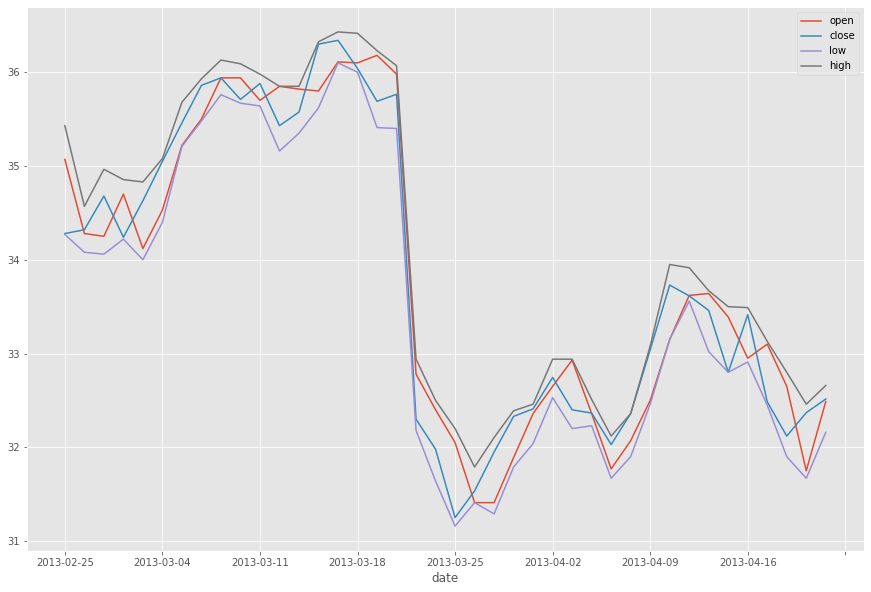

In [51]:
df[10:50].plot(kind = "line",x = 'date' , y = ['open', 'close', 'low','high'])

**Grapical Visualization of Yearly Based Open, Close, High and Low Stocks Over Month**

In [52]:
df['months'] = pd.DatetimeIndex(df['date']).month
df.head()

,date,open,high,low,close,volume,Name,year,months
0,2013-02-08,34.76,34.98,34.50,34.90,19255621,ORCL,2013,2
1,2013-02-11,34.98,35.04,34.55,34.96,12648514,ORCL,2013,2
2,2013-02-12,34.89,35.25,34.85,35.11,14665754,ORCL,2013,2
3,2013-02-13,35.21,35.26,34.88,34.99,13176762,ORCL,2013,2
4,2013-02-14,34.87,35.07,34.69,34.90,15886750,ORCL,2013,2


In [53]:
yearly_open_Pivot = pd.pivot_table(df, values = "open", columns = "year", index = "months")
yearly_close_Pivot = pd.pivot_table(df, values = "close", columns = "year", index = "months")
yearly_high_Pivot = pd.pivot_table(df, values = "high", columns = "year", index = "months")
yearly_low_Pivot = pd.pivot_table(df, values = "low", columns = "year", index = "months")

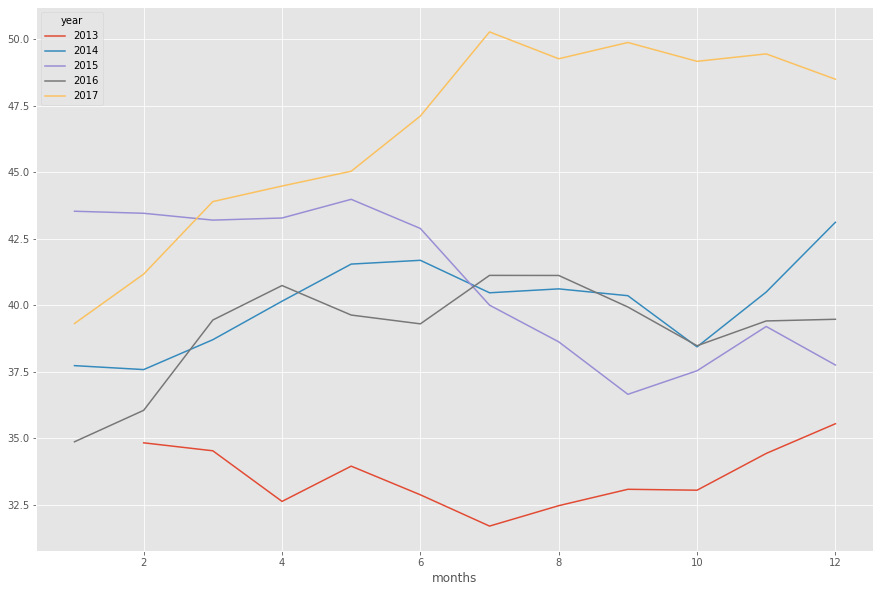

In [54]:
yearly_open_Pivot.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3fe049bb10>,
      dtype=object)

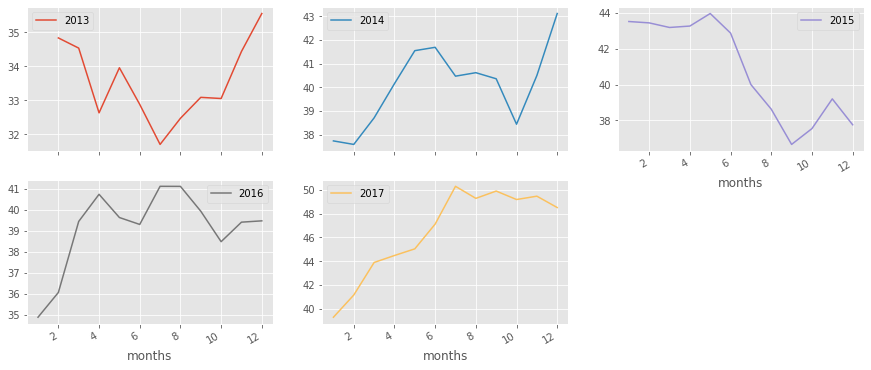

In [55]:
yearly_open_Pivot.plot(subplots = True, figsize=(15, 10), layout=(3,3))

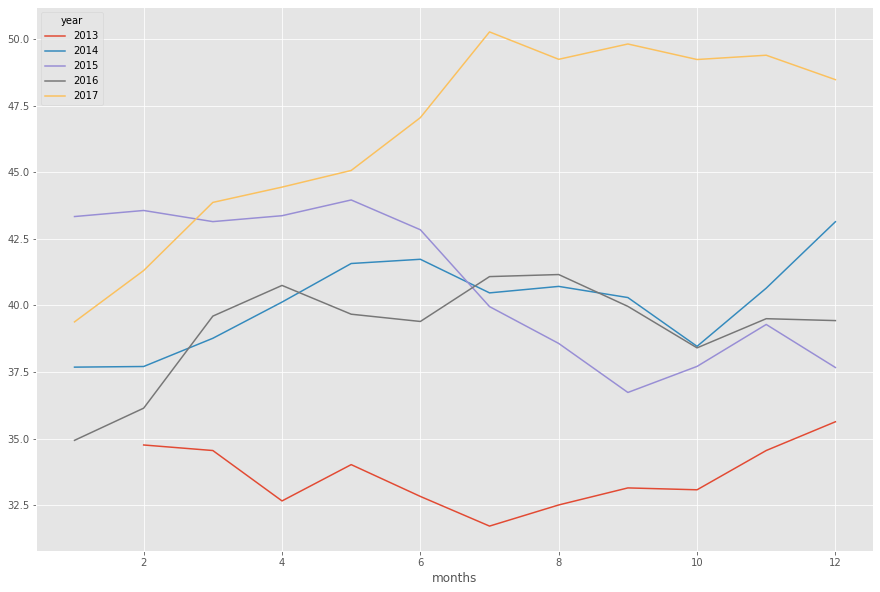

In [56]:
yearly_close_Pivot.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3fe01322d0>,
      dtype=object)

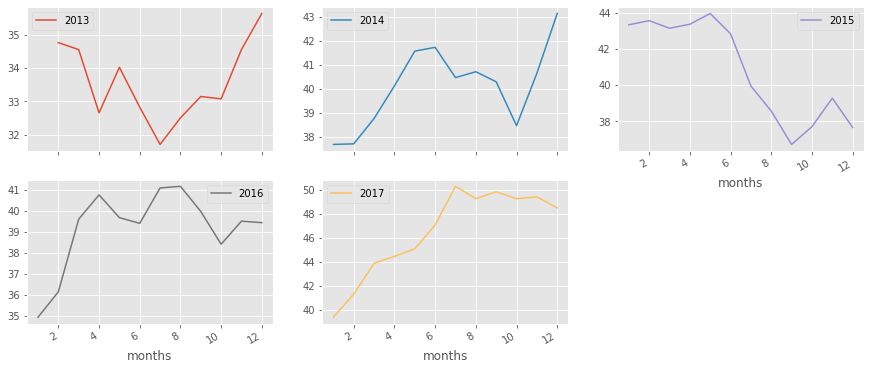

In [57]:
yearly_close_Pivot.plot(subplots = True, figsize=(15, 10), layout=(3,3))

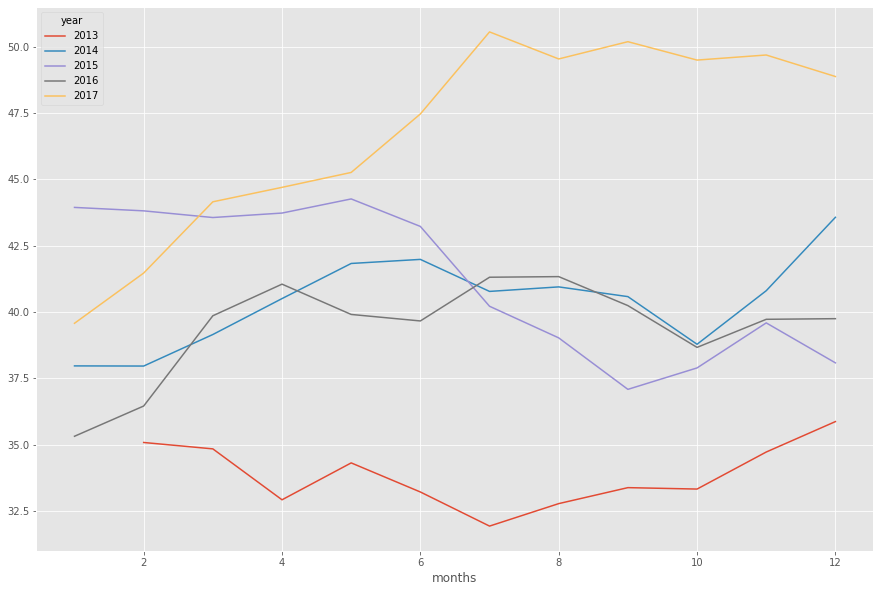

In [58]:
yearly_high_Pivot.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3fdfde5390>,
      dtype=object)

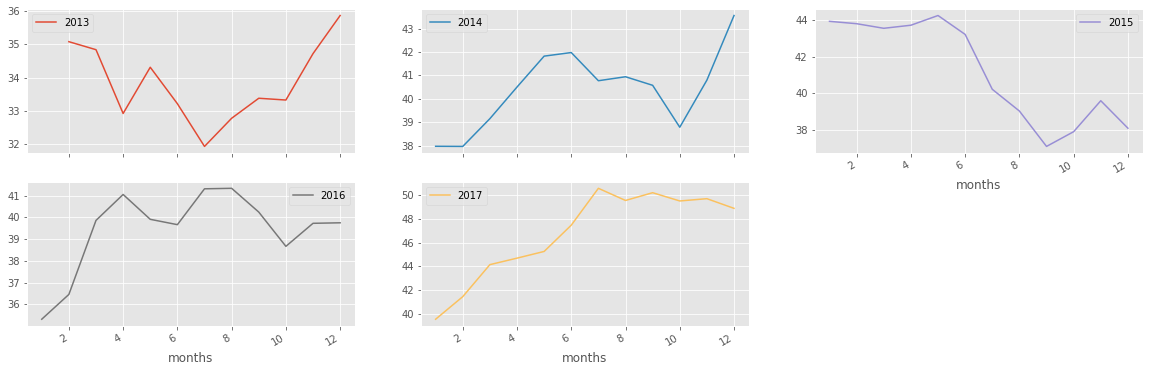

In [59]:
yearly_high_Pivot.plot(subplots = True, figsize=(20, 10), layout=(3,3))

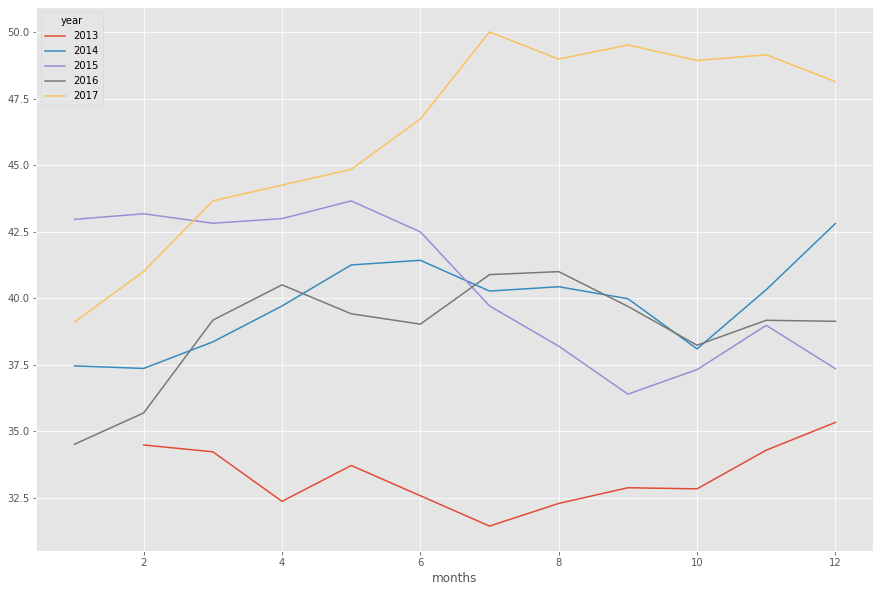

In [60]:
yearly_low_Pivot.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3fde740d50>,
      dtype=object)

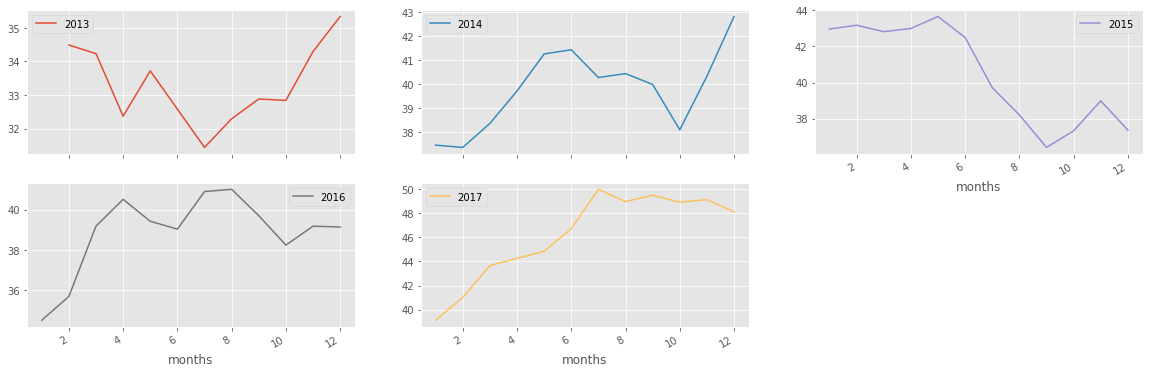

In [61]:
yearly_low_Pivot.plot(subplots = True, figsize=(20, 10), layout=(3,3))

# Predicting the Closing Price Stock of Oracle ORCL

In [62]:
df.head()

,date,open,high,low,close,volume,Name,year,months
0,2013-02-08,34.76,34.98,34.50,34.90,19255621,ORCL,2013,2
1,2013-02-11,34.98,35.04,34.55,34.96,12648514,ORCL,2013,2
2,2013-02-12,34.89,35.25,34.85,35.11,14665754,ORCL,2013,2
3,2013-02-13,35.21,35.26,34.88,34.99,13176762,ORCL,2013,2
4,2013-02-14,34.87,35.07,34.69,34.90,15886750,ORCL,2013,2


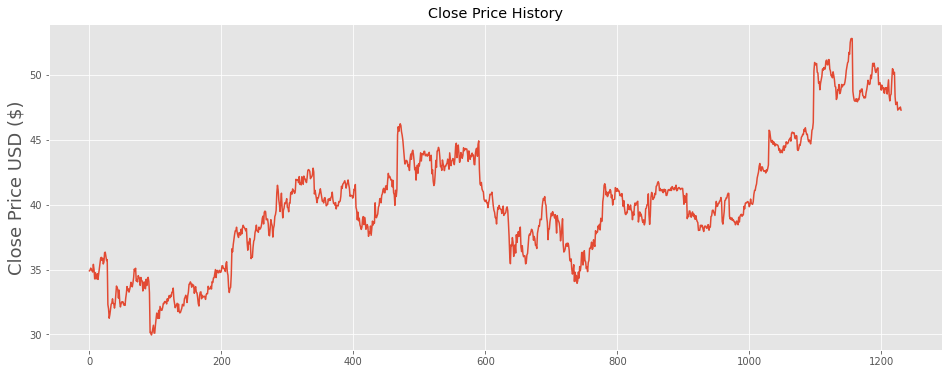

In [63]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['close'])
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [64]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1170

In [65]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.21628722],
       [0.21891419],
       [0.22548161],
       ...,
       [0.76269702],
       [0.76882662],
       [0.75831874]])

In [66]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.21628722, 0.21891419, 0.22548161, 0.22022767, 0.21628722,
       0.21234676, 0.23817863, 0.22088441, 0.18914186, 0.20971979,
       0.18914186, 0.19089317, 0.20665499, 0.18739054, 0.20446585,
       0.22285464, 0.2408056 , 0.25831874, 0.26182137, 0.25175131,
       0.2591944 , 0.23949212, 0.24584063, 0.27758319, 0.2793345 ,
       0.26619965, 0.25087566, 0.25415937, 0.10245184, 0.08844133,
       0.05647986, 0.06895797, 0.08712785, 0.10376532, 0.10726795,
       0.1219352 , 0.10683012, 0.10529772, 0.09063047, 0.10507881,
       0.13485114, 0.1650613 , 0.16002627, 0.15323993, 0.12434326,
       0.1512697 , 0.11055166, 0.09457093, 0.10551664, 0.11186515,
       0.10945709, 0.11164623, 0.10113835, 0.10503503, 0.09982487,
       0.1234676 , 0.14010508, 0.16330998, 0.1497373 , 0.15542907])]
[0.1444833625218913]

[array([0.21628722, 0.21891419, 0.22548161, 0.22022767, 0.21628722,
       0.21234676, 0.23817863, 0.22088441, 0.18914186, 0.20971979,
       0.18914186, 0.19089317, 0.206

In [33]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, batch_size=8, epochs=100)

Epoch 1/100
139/139 [==============================] - 12s 59ms/step - loss: 0.0077
Epoch 2/100
139/139 [==============================] - 8s 58ms/step - loss: 0.0023
Epoch 3/100
139/139 [==============================] - 8s 60ms/step - loss: 0.0019
Epoch 4/100
139/139 [==============================] - 8s 61ms/step - loss: 0.0017
Epoch 5/100
139/139 [==============================] - 8s 60ms/step - loss: 0.0016
Epoch 6/100
139/139 [==============================] - 9s 62ms/step - loss: 0.0014
Epoch 7/100
139/139 [==============================] - 8s 59ms/step - loss: 0.0012
Epoch 8/100
139/139 [==============================] - 8s 60ms/step - loss: 0.0011
Epoch 9/100
139/139 [==============================] - 8s 60ms/step - loss: 0.0011
Epoch 10/100
139/139 [==============================] - 8s 59ms/step - loss: 8.6104e-04
Epoch 11/100
139/139 [==============================] - 8s 60ms/step - loss: 8.5599e-04
Epoch 12/100
139/139 [==============================] - 8s 59ms/step - loss:

In [ ]:
plt.plot(history.history['loss'])

In [35]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

0.48903829437926816

0.48903829437926816

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


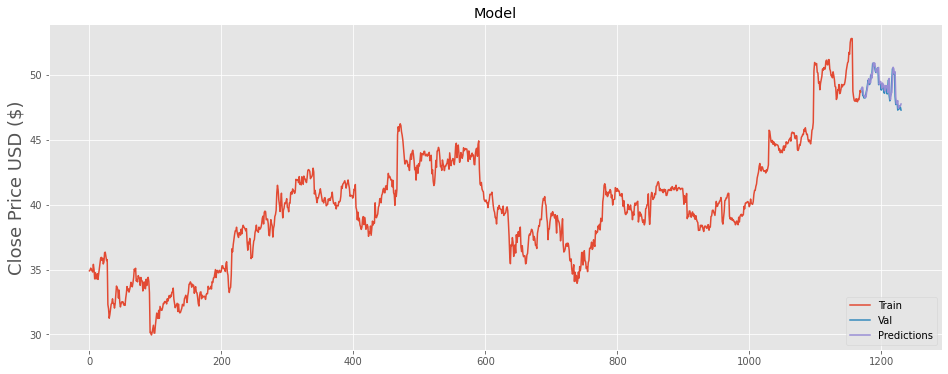

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


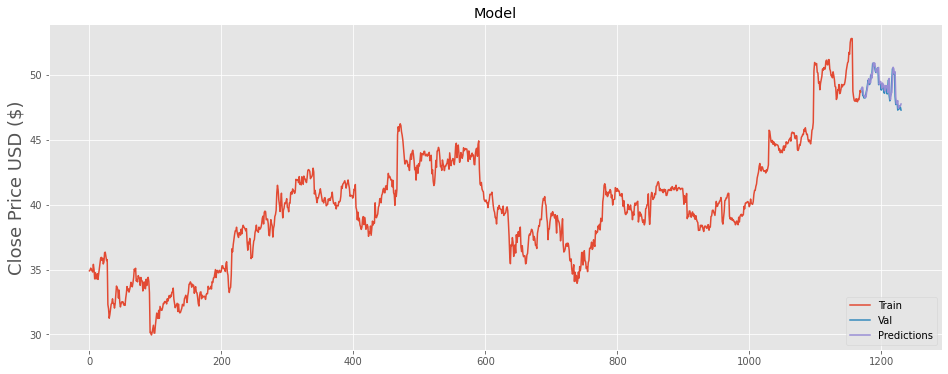

In [36]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [37]:
# Show the valid and predicted prices
valid

,close,Predictions
1170,48.90,48.875397
1171,48.91,49.057220
1172,48.40,49.015640
1173,48.36,48.468380
1174,48.21,48.424152
...,...,...
1226,47.36,47.415443
1227,47.43,47.543793
1228,47.38,47.629124
1229,47.52,47.598137


,close,Predictions
1170,48.90,48.875397
1171,48.91,49.057220
1172,48.40,49.015640
1173,48.36,48.468380
1174,48.21,48.424152
...,...,...
1226,47.36,47.415443
1227,47.43,47.543793
1228,47.38,47.629124
1229,47.52,47.598137
